In [12]:
import re
# We have a 150 pixel image 
n_pix = 25*6
# and a sequence of 15000 values (counted on terminal with '$wc -c input.txt', minus newlines) for those pixels, 
# which means we have
n_layers = 15000/n_pix
# layers, each with 150 pixels

# By cycling over these layers we can find the solution to our problem

with open("input.txt", 'r') as infile:
    encoded_image = infile.read().replace('\n', '')

encoded_image = [int(x) for x in list(encoded_image)]

# global variable for counting
count = 0
# initialize the minimum number of zeros in a layer to the max value, 150, when each pixel is 0
min_zeros = 150
# this stores the value of (n°1 in layer)*(n°2 in layer)
target_val = 0

while count != len(encoded_image):

    # reset variables
    zeros_in_layer = 0
    ones_in_layer = 0
    
    # cycle over layer
    for i in range(n_pix):
        
        if encoded_image[count + i] == 0:
            zeros_in_layer += 1 
        elif encoded_image[count + i] == 1:
            ones_in_layer += 1
        
    # increase layer counter   
    count += n_pix
    
    # look for minimum and store value.
    if zeros_in_layer < min_zeros:
        min_zeros = zeros_in_layer
        target_val = ones_in_layer*(n_pix - ones_in_layer - zeros_in_layer)
        
print(zeros_in_layer, target_val)

57 1064


### Rendering the Image

In [52]:
import matplotlib.pyplot as plt

# Initialize all pixel value to transparent
pixels_col = [2 for i in range(n_pix)]
count = 0

# Go through the encoded image in reverse order: this is easier in view of the fact that the first layer 
# is the one we want to render on the front.
for value in reversed(encoded_image):
    
    # If value is transparent do nothing, else save the value to the pixel
    if value == 2:
        pass
    else:
        # the index in the pixel list is modulo 150
        pixels_col[count%n_pix] = value
    
    count += 1 

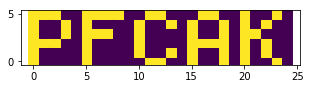

In [59]:
plt.figure(figsize=(5, 1))
# Now we have a pixel list which is in reverse order: the first pixel is the bottom right instead of top
# left as it was in the encoded image. However to print the image this is not important. We decided to render
# the image as a scatter plot. First we must assign each pixel a position in the plane: points on a grid 
# of size 25 times 6 will do the job. 
X = np.array([(24-i)%25 for i in range(n_pix)]) # (24, 23, 22, ... 0, 24, 23, ... 0)
Y = np.array([int(i/25) for i in range(n_pix)]) # (0, 0, ... 0, 1, 1, ... 1, ... 5, 5)

# The funny-looking way by which we initialized the x and y coordinates of the points has a simple
# explanation: if the ORDER in which the pairs of (x,y) values appear mimic the ORDER of the pixel color list, 
# i.e. the position start from bottom-right (24, 0) all the way through (0, 5), than we can render the 
# image simply as
plt.scatter(X, Y, c = pixels_col, s = 100, marker = 's')

In [ ]:
PFCAK